In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("emails.csv")

In [22]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df.shape

(5172, 3002)

In [24]:
df.describe()       

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [25]:
df = df.drop("Email No.", axis=1)

In [26]:
df.isna().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

C:\Users\prajw\AppData\Local\Temp\ipykernel_26344\422357721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Prediction"])


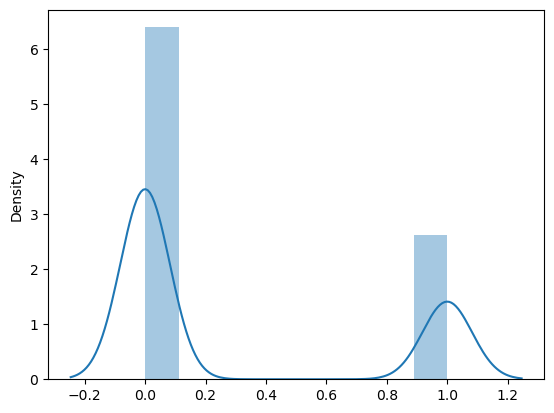

In [8]:
sns.distplot(x=df["Prediction"])
plt.show()

In [27]:

x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [31]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    roc_curve,
)

def report(classifier, x_test, y_test):
    # Predict the labels
    y_pred = classifier.predict(x_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    display.plot()
    
    # Metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision Score:  {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall Score:  {recall_score(y_test, y_pred, average='weighted'):.2f}")
    
    # Precision-Recall Curve and ROC Curve (for binary or probabilistic classifiers)
    try:
        precision_recall_curve(classifier, x_test, y_test)
        roc_curve(classifier, x_test, y_test)
    except AttributeError:
        print("plot_precision_recall_curve and plot_roc_curve require a classifier with 'predict_proba' or 'decision_function'.")

# Usage:
# report(classifier, x_test, y_test)



In [32]:

from sklearn.neighbors import KNeighborsClassifier

In [33]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Accuracy:  0.88
Precision Score:  0.88
Recall Score:  0.88


TypeError: too many positional arguments

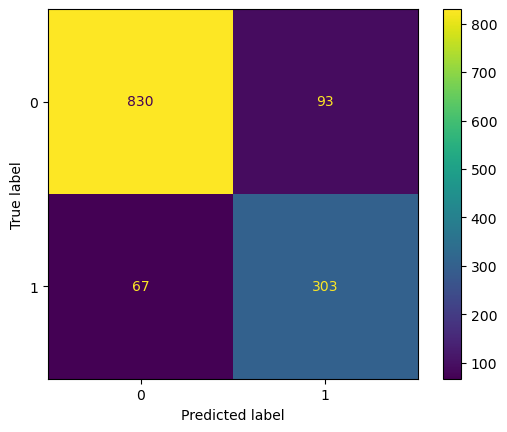

In [35]:
report(kNN, x_test, y_test)

In [36]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=10)

Accuracy:  0.91
Precision Score:  0.91
Recall Score:  0.91


TypeError: too many positional arguments

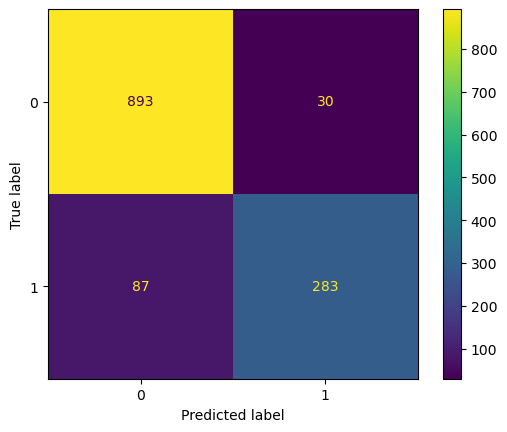

In [38]:
report(svm,x_test,y_test)